## Classical ML

## Data Loading and preproccessing

In [33]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split 
# Model Building
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_auc_score, f1_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   



import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = list(stopwords.words("english"))

warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yurib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('C:\\Users\\yurib\\Downloads\\IMDB_data\\IMDB_dataset.csv')

In [5]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [36]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
df['target'] = df['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)
df.head()

review sentiment  target
0  One of the other reviewers has mentioned that ...  positive       1
1  A wonderful little production. <br /><br />The...  positive       1
2  I thought this was a wonderful way to spend ti...  positive       1
3  Basically there's a family where a little boy ...  negative       0
4  Petter Mattei's "Love in the Time of Money" is...  positive       1

In [10]:
positive = df[df['target'] == 1].review
negative = df[df['target'] == 0].review

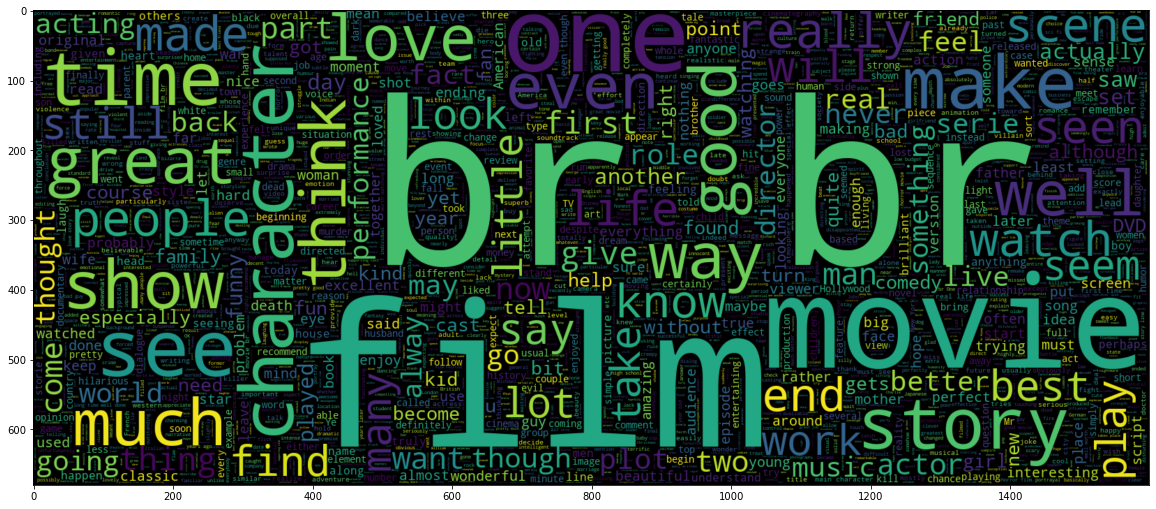

In [12]:
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')


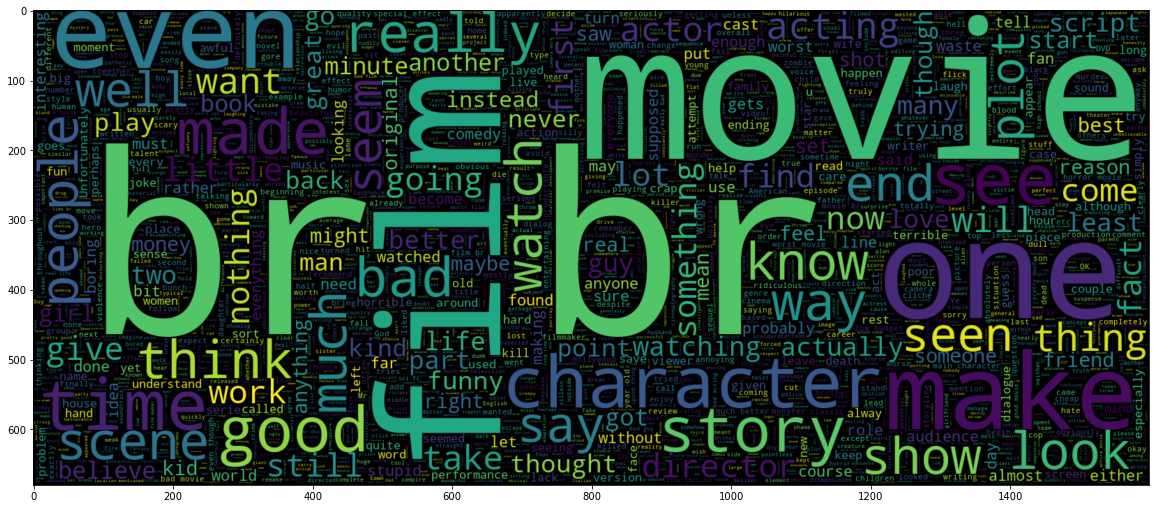

In [13]:
# world could of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
#ax.grid(False)

### preproccessing

In [18]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)


# Apply functions on tweets
df['final_text'] = df['review'].apply(lambda x : remove_username(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : char(x))
print('done')
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
print('done')
#df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))
#print('done')

done
done
done
done
done
done
done
done


In [19]:
df

review sentiment  target  \
0      One of the other reviewers has mentioned that ...  positive       1   
1      A wonderful little production. <br /><br />The...  positive       1   
2      I thought this was a wonderful way to spend ti...  positive       1   
3      Basically there's a family where a little boy ...  negative       0   
4      Petter Mattei's "Love in the Time of Money" is...  positive       1   
...                                                  ...       ...     ...   
49995  I thought this movie did a down right good job...  positive       1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative       0   
49997  I am a Catholic taught in parochial elementary...  negative       0   
49998  I'm going to have to disagree with the previou...  negative       0   
49999  No one expects the Star Trek movies to be high...  negative       0   

                                              final_text  
0      one of the other reviewers has mentioned that ...  
1      a wonderful little production br br the filmin...  
2      i thought this was a wonderful way to spend ti...  
3      basically there is a family where a little boy...  
4      petter mattei is love in the time of money is ...  
...                                                  ...  
49995  i thought this movie did a down right good job...  
49996  bad plot bad dialogue bad acting idiotic direc...  
49997  i am a catholic taught in parochial elementary...  
49998  i am going to have to disagree with the previo...  
49999  no one expects the star trek movies to be high...  

[50000 rows x 4 columns]

positive reviews


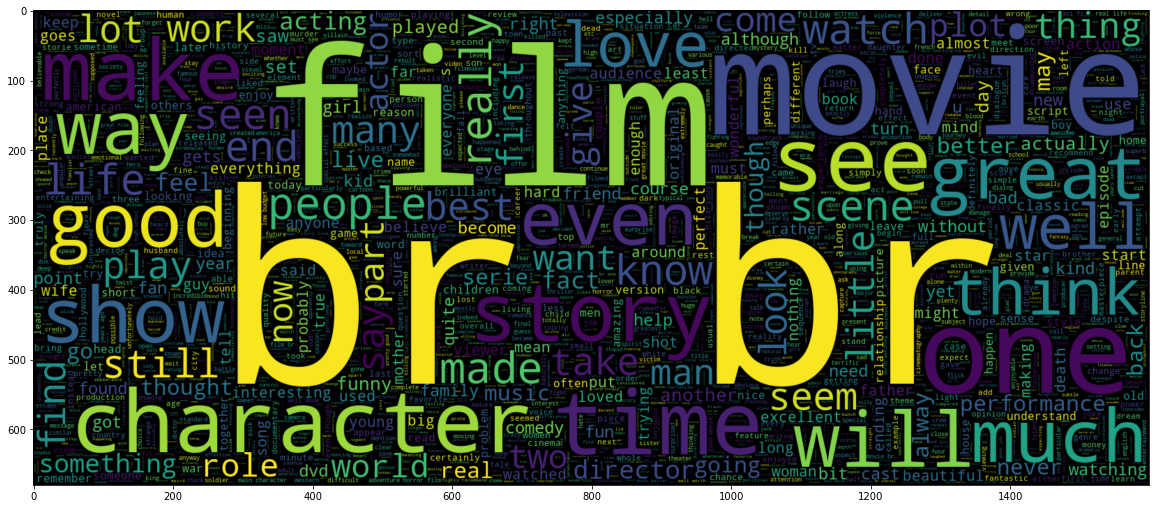

negative reviews


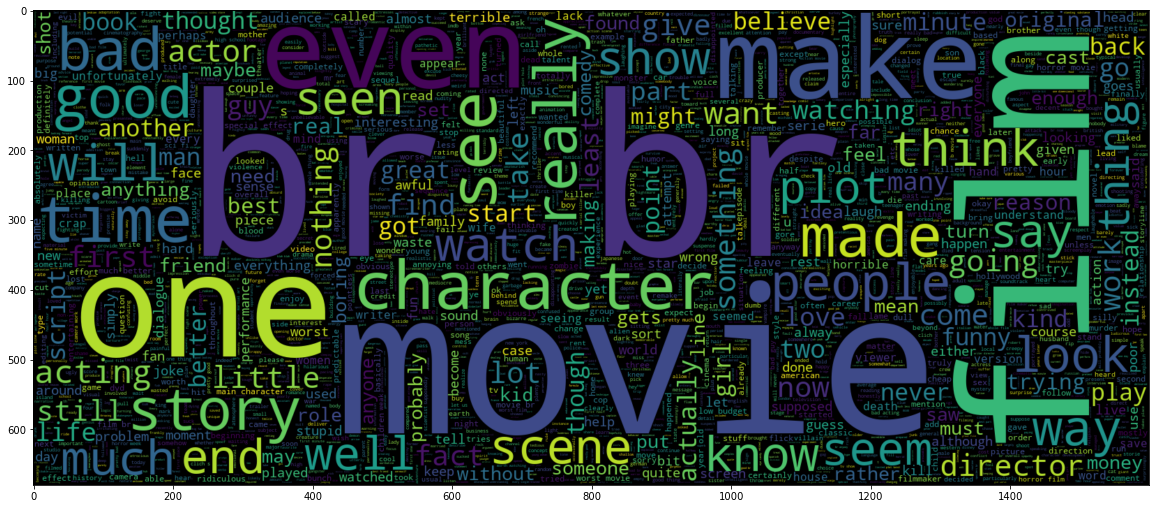

In [37]:
positive = df[df['target'] == 1].final_text
negative = df[df['target'] == 0].final_text

print('positive reviews')
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
plt.show()


print('negative reviews')
# world could of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
plt.show()
#ax.grid(False)

### LinearSVC

In [47]:
train_texts, val_texts, train_labels, val_labels = train_test_split(df['final_text'], 
                                                                    df['target'], 
                                                                    test_size = 0.2, 
                                                                    stratify=df['target'])

find best params for TfIdfVect

In [51]:
results = {}
for i in [None, 3000, 10000, 50000]:
    for j in [(1, 1), (1, 2), (1,3)]:
        for k in [True, False]:
            print(f'Max fts: {i}, ngram_range: {j}, include stopwords: {k}')
            if k:
                tf_idf = TfidfVectorizer(stop_words=en_stopwords, ngram_range=j, max_features=i)
                tf_idf.fit(train_texts)
            else :
                tf_idf = TfidfVectorizer(ngram_range=j, max_features=i)
                tf_idf.fit(train_texts)
            
            Train_tf_idf = tf_idf.transform(train_texts)
            Test_tf_idf = tf_idf.transform(val_texts)
            model = LinearSVC().fit(Train_tf_idf, train_labels)
            result = f1_score(val_labels, model.predict(Test_tf_idf))
            print(result)
            results[f'{i}, {j}, {k}'] = [result, model]

Max fts: None, ngram_range: (1, 1), include stopwords: True
0.900377808709485
Max fts: None, ngram_range: (1, 1), include stopwords: False
0.9036240541616886
Max fts: None, ngram_range: (1, 2), include stopwords: True
0.9109771761683628
Max fts: None, ngram_range: (1, 2), include stopwords: False
0.9204838389847314
Max fts: None, ngram_range: (1, 3), include stopwords: True
0.9078713750246598
Max fts: None, ngram_range: (1, 3), include stopwords: False
0.9170538803756796
Max fts: 3000, ngram_range: (1, 1), include stopwords: True
0.8854550892234073
Max fts: 3000, ngram_range: (1, 1), include stopwords: False
0.8875609999004083
Max fts: 3000, ngram_range: (1, 2), include stopwords: True
0.8839241386158275
Max fts: 3000, ngram_range: (1, 2), include stopwords: False
0.8866287765480108
Max fts: 3000, ngram_range: (1, 3), include stopwords: True
0.8841833184213143
Max fts: 3000, ngram_range: (1, 3), include stopwords: False
0.8873815461346632
Max fts: 10000, ngram_range: (1, 1), include st

Best params for vectorizer are : Max fts: None, ngram_range: (1, 2), include stopwords: False

### LinearSVC GridSearch

In [54]:
tf_idf = TfidfVectorizer(ngram_range=(1,2))
tf_idf.fit(train_texts)

Train_tf_idf = tf_idf.transform(train_texts)
Test_tf_idf = tf_idf.transform(val_texts)

In [55]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty' : ['l2'],
              'C' : np.logspace(-4, 4, 20)
             }

svc=LinearSVC()

svc_cv = GridSearchCV(svc, param_grid, cv=3, scoring = 'f1', n_jobs=-1, verbose = 1000)
svc_cv.fit(Train_tf_idf, train_labels)

print("tuned hpyerparameters :(best parameters) ", svc_cv.best_params_)
print("accuracy :", svc_cv.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
tuned hpyerparameters :(best parameters)  {'C': 4.281332398719396, 'penalty': 'l2'}
accuracy : 0.913654392291441


In [56]:
f1_score(val_labels, svc_cv.best_estimator_.predict(Test_tf_idf))

0.9213817748659917

## Mlflow

In [ ]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from joblib import dump, load

from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_auc_score, f1_score

from preproccessing import *

import logging



mlflow.set_tracking_uri("http://localhost:5000")

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


def eval_metrics(actual, pred):
    f1 = f1_score(actual, pred)
    acc = accuracy_score(actual, pred)
    return f1, acc


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(42)

    # Read data
    try:
        df = pd.read_csv('IMDB_dataset.csv')
        df['target'] = df['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)
    except Exception as e:
        logger.exception(
            "Unable to get training & test CSV, check that data is in the current folder. Error: %s", e
        )

    print('Data loaded')
    df = preproccess(df, 'review')
    
    print('data preproccessed')
    
    train_x, test_x, train_y, test_y = train_test_split(df['final_text'], 
                                                    df['target'], 
                                                    test_size = 0.2, 
                                                    stratify=df['target'])


    C = float(sys.argv[1]) if len(sys.argv) > 1 else 1

    print('start training model... ')
    
    with mlflow.start_run():

        tf_idf = TfidfVectorizer(ngram_range=(1,2), max_features = 3000)
        tf_idf.fit(train_x)

        train_x = tf_idf.transform(train_x)
        test_x = tf_idf.transform(test_x)

        model = LinearSVC(C = C).fit(train_x, train_y)

        predicted_qualities = model.predict(test_x)

        (f1, acc) = eval_metrics(test_y, predicted_qualities)

        print("LinearSVC model (C=%f):" % (C))
        print("f1_score: %s" % f1)
        print("accuracy_score: %s" % acc)


        mlflow.log_param("C", C)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("accuracy_score", acc)


        dump(model, '../inference/LinearSVC.joblib') 
        dump(tf_idf, '../inference/TfIdfVectorizer.joblib')
        print('model saved: ../inference/LinearSVC.joblib')
        print('vectorizer saved: ../inference/TfIdfVectorizer.joblib')

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(model, "model", registered_model_name="LinearSVC")
        else:
            mlflow.sklearn.log_model(model, "model")


### CatBoost

In [41]:
catboost_params = {

    'eval_metric': 'Logloss',
    'early_stopping_rounds': 25,
    'use_best_model': True,
    'verbose': 1
}


X_tr, X_val, y_tr, y_val = train_test_split(df[['final_text']], 
                                            df['target'], stratify = df['target'], 
                                            test_size = 0.2)





train_pool = Pool(
    X_tr, 
    y_tr, 
    text_features=['final_text'],
    feature_names=['final_text']
)
valid_pool = Pool(
    X_val, 
    y_val, 
    text_features=['final_text'],
    feature_names=['final_text']
)

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=valid_pool)

Learning rate set to 0.078817
0:	learn: 0.6458504	test: 0.6443029	best: 0.6443029 (0)	total: 567ms	remaining: 9m 26s
1:	learn: 0.6055451	test: 0.6027335	best: 0.6027335 (1)	total: 891ms	remaining: 7m 24s
2:	learn: 0.5721431	test: 0.5681146	best: 0.5681146 (2)	total: 1.14s	remaining: 6m 18s
3:	learn: 0.5427600	test: 0.5377819	best: 0.5377819 (3)	total: 1.39s	remaining: 5m 45s
4:	learn: 0.5181840	test: 0.5121373	best: 0.5121373 (4)	total: 1.66s	remaining: 5m 30s
5:	learn: 0.4955439	test: 0.4885891	best: 0.4885891 (5)	total: 1.88s	remaining: 5m 12s
6:	learn: 0.4745687	test: 0.4667357	best: 0.4667357 (6)	total: 2.11s	remaining: 4m 59s
7:	learn: 0.4582884	test: 0.4493495	best: 0.4493495 (7)	total: 2.37s	remaining: 4m 53s
8:	learn: 0.4451749	test: 0.4355199	best: 0.4355199 (8)	total: 2.59s	remaining: 4m 45s
9:	learn: 0.4345420	test: 0.4243123	best: 0.4243123 (9)	total: 2.86s	remaining: 4m 42s
10:	learn: 0.4242847	test: 0.4132873	best: 0.4132873 (10)	total: 3.03s	remaining: 4m 32s
11:	learn: 

In [42]:
f1_score(y_val, model.predict(X_val))

0.9086934923000496

In [43]:
f1_score(y_tr, model.predict(X_tr))

0.9662636214360353

# Gradio

In [27]:
def get_preiction(text):
    model = load('../inference/LinearSVC.joblib')
    tfidf = load('../inference/TfIdfVectorizer.joblib')
    
    text = pd.DataFrame([text])
    text.columns = ['review']
    
    text = preproccess(text, 'review')
    
    text = tfidf.transform(text['final_text'])
    
    result = model.predict(text)
    
    if result[0] == 0:
        return 'negtive'
    else :
        return 'positive'

In [28]:
import gradio as gr

iface = gr.Interface(fn=get_preiction, inputs="text", outputs="text")
iface.launch()

Running on local URL:  http://127.0.0.1:7865/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7865/', None)

done
done
done
done
done
done
done
done
